In [3]:
import pandas as pd
from scipy import stats
import math
import matplotlib.pyplot as plt
import numpy as np

In [4]:
reader=pd.read_csv("/Users/miyakesho/Box Sync/Personal/m6A/data/phase2/Reader/GSE63591_C-Y1-Ribosome_profiling.csv")
reader

,Gene symbol,siControl_ribo1,siYTHDF1_ribo1,ribo_log2(siYTHDF1/siControl)1,siControl_RNA1,siYTHDF1_RNA1,polyA_log2(siYTHDF1/siControl)1,TE_log2(siYTHDF1/siControl)1,siControl_ribo2,siYTHDF1_ribo2,ribo_log2(siYTHDF1/siControl),siControl_RNA2,siYTHDF1_RNA2,polyA_log2(siYTHDF1/siControl)2,TE_log2(siYTHDF1/siControl)2,ribo_log2(siYTHDF1/siControl)ave,polyA_log2(siYTHDF1/siControl)ave,TE_log2(siYTHDF1/siControl)ave
0,A4GALT,26.23,17.15,-0.61,3.60,3.39,-0.09,-0.53,3.49,0.87,-2.00,8.36,11.91,0.51,-2.51,-1.31,0.21,-1.52
1,AAAS,160.80,148.75,-0.11,14.76,12.14,-0.28,0.17,41.45,27.44,-0.59,39.22,31.38,-0.32,-0.27,-0.35,-0.30,-0.05
2,AACS,43.31,18.43,-1.23,4.18,3.88,-0.11,-1.12,16.01,8.05,-0.99,9.68,13.93,0.53,-1.52,-1.11,0.21,-1.32
3,AADAT,1.97,3.56,0.86,2.99,2.18,-0.45,1.31,4.48,3.84,-0.22,2.87,3.04,0.08,-0.30,0.32,-0.19,0.50
4,AAED1,57.07,33.83,-0.75,14.53,17.41,0.26,-1.02,47.20,28.77,-0.71,20.16,22.77,0.18,-0.89,-0.73,0.22,-0.95
5,AAGAB,6.59,13.31,1.01,40.07,28.04,-0.51,1.53,18.66,33.61,0.85,34.83,34.94,0.00,0.84,0.93,-0.26,1.19
6,AAK1,0.60,2.74,2.18,3.37,3.93,0.22,1.96,1.31,1.61,0.29,2.62,2.82,0.11,0.18,1.23,0.16,1.07
7,AAMP,36.81,127.20,1.79,13.09,11.63,-0.17,1.96,46.72,22.51,-1.05,40.13,45.91,0.19,-1.25,0.37,0.01,0.36
8,AARS,706.51,315.19,-1.16,117.73,128.06,0.12,-1.29,161.81,88.49,-0.87,131.13,131.65,0.01,-0.88,-1.02,0.06,-1.08
9,AARS2,7.80,11.03,0.50,2.62,3.18,0.28,0.22,2.92,2.23,-0.39,9.06,8.05,-0.17,-0.22,0.06,0.06,0.00


In [5]:
pvalue=[]
for i in range(0,len(reader)):
    P=[]
    col=reader.iloc[i]
    KD_TE1=col.siYTHDF1_ribo1/col.siYTHDF1_RNA1
    CL_TE1=col.siControl_ribo1/col.siControl_RNA1
    KD_TE2=col.siYTHDF1_ribo2/col.siYTHDF1_RNA2
    CL_TE2=col.siControl_ribo2/col.siControl_RNA2
    KD=[KD_TE1,KD_TE2]
    CL=[CL_TE1,CL_TE2]
    s,p=stats.ttest_ind(KD, CL)
    #p=-math.log10(p)
    P.append(p)
    pvalue.append(P)

In [6]:
pvalue=pd.DataFrame(pvalue,columns=["pvalue"])
pvalue

,pvalue
0,0.790516
1,0.944792
2,0.560169
3,0.559611
4,0.218001
5,0.352341
6,0.230083
7,0.554088
8,0.505059
9,0.924221


In [7]:
merge=pd.concat([reader,pvalue], axis=1)
merge

,Gene symbol,siControl_ribo1,siYTHDF1_ribo1,ribo_log2(siYTHDF1/siControl)1,siControl_RNA1,siYTHDF1_RNA1,polyA_log2(siYTHDF1/siControl)1,TE_log2(siYTHDF1/siControl)1,siControl_ribo2,siYTHDF1_ribo2,ribo_log2(siYTHDF1/siControl),siControl_RNA2,siYTHDF1_RNA2,polyA_log2(siYTHDF1/siControl)2,TE_log2(siYTHDF1/siControl)2,ribo_log2(siYTHDF1/siControl)ave,polyA_log2(siYTHDF1/siControl)ave,TE_log2(siYTHDF1/siControl)ave,pvalue
0,A4GALT,26.23,17.15,-0.61,3.60,3.39,-0.09,-0.53,3.49,0.87,-2.00,8.36,11.91,0.51,-2.51,-1.31,0.21,-1.52,0.790516
1,AAAS,160.80,148.75,-0.11,14.76,12.14,-0.28,0.17,41.45,27.44,-0.59,39.22,31.38,-0.32,-0.27,-0.35,-0.30,-0.05,0.944792
2,AACS,43.31,18.43,-1.23,4.18,3.88,-0.11,-1.12,16.01,8.05,-0.99,9.68,13.93,0.53,-1.52,-1.11,0.21,-1.32,0.560169
3,AADAT,1.97,3.56,0.86,2.99,2.18,-0.45,1.31,4.48,3.84,-0.22,2.87,3.04,0.08,-0.30,0.32,-0.19,0.50,0.559611
4,AAED1,57.07,33.83,-0.75,14.53,17.41,0.26,-1.02,47.20,28.77,-0.71,20.16,22.77,0.18,-0.89,-0.73,0.22,-0.95,0.218001
5,AAGAB,6.59,13.31,1.01,40.07,28.04,-0.51,1.53,18.66,33.61,0.85,34.83,34.94,0.00,0.84,0.93,-0.26,1.19,0.352341
6,AAK1,0.60,2.74,2.18,3.37,3.93,0.22,1.96,1.31,1.61,0.29,2.62,2.82,0.11,0.18,1.23,0.16,1.07,0.230083
7,AAMP,36.81,127.20,1.79,13.09,11.63,-0.17,1.96,46.72,22.51,-1.05,40.13,45.91,0.19,-1.25,0.37,0.01,0.36,0.554088
8,AARS,706.51,315.19,-1.16,117.73,128.06,0.12,-1.29,161.81,88.49,-0.87,131.13,131.65,0.01,-0.88,-1.02,0.06,-1.08,0.505059
9,AARS2,7.80,11.03,0.50,2.62,3.18,0.28,0.22,2.92,2.23,-0.39,9.06,8.05,-0.17,-0.22,0.06,0.06,0.00,0.924221


In [13]:
pvalue=[0.1,0.05,0.03,0.01]
TE_threshold=[-0.415,-1,-2]
for i in pvalue:
    for j in TE_threshold:
        length=merge[merge.pvalue<i]
        length=length[length["TE_log2(siYTHDF1/siControl)ave"]<j]
        print(i,j,len(length))

0.1 -0.415 277
0.1 -1 193
0.1 -2 44
0.05 -0.415 131
0.05 -1 92
0.05 -2 22
0.03 -0.415 73
0.03 -1 52
0.03 -2 17
0.01 -0.415 22
0.01 -1 14
0.01 -2 4


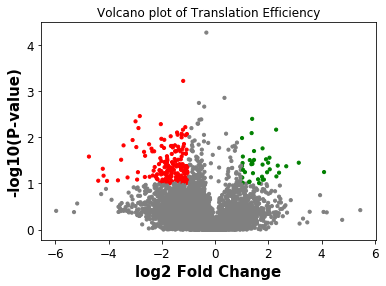

In [26]:
# to see first few lines of table and get table dimensions
#print(merge.head()) # first five lines
#print(merge.info()) # table information including dimensions

# this gene expression dataset has 19025 genes
# we need to add color column to visualize up, downregulated and intermediate genes
# here you can also change the log2 fold change (log2FC) and P-value (p-value) numbers 
# as per your need
merge.loc[(merge['TE_log2(siYTHDF1/siControl)ave'] >= 1) & (merge['pvalue'] < 0.1), 'color'] = "green"  # upregulated
merge.loc[(merge['TE_log2(siYTHDF1/siControl)ave'] <=- 1) & (merge['pvalue'] < 0.1), 'color'] = "red"   # downregulated
merge['color'].fillna('grey', inplace=True) # intermediate

# to reduce the noise, filter out genes with low expression counts across treatments 
# (say, < 10 normalized expression count)
# you can change this number as per your requirement and based on expression unit 
# value1 and value2 represents counts for stress and control treatments respectively
#merge = merge.loc[(d['value1'] >= 10) & (d['value2'] >= 10)]

# Now, data is ready for volcano plot
# In volcano plot, Y-axis is -log10 normalized P-value
# NOTE: Here you may get "RuntimeWarning: divide by zero encountered in log10" where 
# there is 0 P-value. To avoid this warning replace 0 with smallest non-zero P-value. 
# To get smallest non-zero P-value, you can use d.nsmallest(2, 'p-value')
# replace 0 P-value with lowest non-zero P-value
# convert P-value to -log10 normalized P-value
merge['logpv']=-(np.log10(merge['pvalue']))

# plot 
plt.scatter(merge['TE_log2(siYTHDF1/siControl)ave'], merge['logpv'], c=merge['color'],s=10)
plt.xlabel('log2 Fold Change',fontsize=15, fontname="sans-serif", fontweight="bold")
plt.ylabel('-log10(P-value)', fontsize=15, fontname="sans-serif", fontweight="bold")
plt.xticks(fontsize=12, fontname="sans-serif")
plt.yticks(fontsize=12, fontname="sans-serif")
plt.title("Volcano plot of Translation Efficiency")
plt.savefig("a.png",dpi=300)
plt.show()

In [27]:
merge[merge.color=="red"].to_csv("statistical_decrease_Reader.csv",index=False)

In [28]:
merge[merge.color=="red"]

,Gene symbol,siControl_ribo1,siYTHDF1_ribo1,ribo_log2(siYTHDF1/siControl)1,siControl_RNA1,siYTHDF1_RNA1,polyA_log2(siYTHDF1/siControl)1,TE_log2(siYTHDF1/siControl)1,siControl_ribo2,siYTHDF1_ribo2,...,siControl_RNA2,siYTHDF1_RNA2,polyA_log2(siYTHDF1/siControl)2,TE_log2(siYTHDF1/siControl)2,ribo_log2(siYTHDF1/siControl)ave,polyA_log2(siYTHDF1/siControl)ave,TE_log2(siYTHDF1/siControl)ave,pvalue,color,logpv
162,ADRA1B,2.79,0.15,-4.18,2.12,2.05,-0.05,-4.13,2.51,2.62,...,2.62,6.10,1.22,-1.16,-2.06,0.59,-2.64,0.072576,red,1.139205
184,AGGF1,24.16,10.18,-1.25,12.45,11.85,-0.07,-1.18,22.90,7.95,...,14.39,13.84,-0.06,-1.47,-1.39,-0.06,-1.32,0.043129,red,1.365231
201,AHCYL1,113.36,22.35,-2.34,25.56,25.58,0.00,-2.34,75.88,33.94,...,27.79,31.94,0.20,-1.36,-1.75,0.10,-1.85,0.092829,red,1.032316
216,AIMP1,301.67,135.88,-1.15,18.37,18.32,0.00,-1.15,289.83,69.06,...,18.62,23.14,0.31,-2.38,-1.61,0.15,-1.76,0.041065,red,1.386524
388,AP4B1,19.52,7.26,-1.43,5.46,5.52,0.02,-1.45,23.59,15.34,...,7.63,7.31,-0.06,-0.56,-1.02,-0.02,-1.00,0.071563,red,1.145311
398,APBB2,4.75,1.59,-1.57,4.78,3.71,-0.37,-1.21,3.01,2.04,...,3.24,4.12,0.35,-0.91,-1.07,-0.01,-1.06,0.008526,red,2.069238
401,APCDD1,2.54,0.28,-3.19,1.48,1.23,-0.27,-2.93,3.87,0.62,...,2.82,3.62,0.36,-2.99,-2.91,0.05,-2.96,0.016374,red,1.785839
452,ARHGAP18,88.71,13.59,-2.71,69.16,42.16,-0.71,-1.99,101.05,1.53,...,49.34,62.09,0.33,-6.38,-4.38,-0.19,-4.19,0.068105,red,1.166822
456,ARHGAP27,6.89,2.48,-1.48,2.77,2.73,-0.02,-1.45,9.06,1.60,...,5.34,5.36,0.00,-2.51,-1.99,-0.01,-1.98,0.096508,red,1.015439
511,ARMC10,8.92,3.54,-1.33,10.03,12.89,0.36,-1.69,19.53,12.83,...,25.68,24.13,-0.09,-0.52,-0.97,0.14,-1.10,0.099211,red,1.003439
